# Spatial Transcriptomics
<p>
<figure>
<img align="right" style="width: 200px;" src="https://user-images.githubusercontent.com/7418190/182963249-6fde0191-7954-4d06-82cd-6111a1992f87.png">
</figure>
</p>  
To demonstrate the functionality of UCD, we will perform a cell type deconvolution of a spatial gene expression section of the <a href="https://www.10xgenomics.com/resources/datasets/human-lymph-node-1-standard-1-0-0">human lymph node</a>, made available by 10X Genomics. We will utilize scanpy to quickly load the dataset, and then pass it into ucdeconvolve to obtain cell type predictions.
</p>

## Load Requires Packages

In [6]:
import ucdeconvolve as ucd
import scanpy as sc
import logging

## Read Lymph Node Dataset

In [7]:
adata = sc.datasets.visium_sge("V1_Human_Lymph_Node")

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

## Obtain Cell Type Predictions
Replace <i>API_KEY</i> with your personal API key. As data is sent for predictions in batches, you can enable a progressbar to show the status of your prediction request. To enable more information about your run, verbosity can be increased using the python logging flag <em>logging.DEBUG</em> which will output the status of each stage of the prediction pipeline as well as post-run metrics. By default logging levels are set to <em>logging.WARNING</em> so leaving this parameter out will result in the function only showing a progressbar.


In [10]:
ucd.tl.deconvolve(adata, API_KEY, showprogress = True, verbosity = logging.DEBUG)

2022-08-05 19:30:25,353|[UCD]|INFO: Starting UniCell Deconvolve Run.
2022-08-05 19:30:25,483|[UCD]|DEBUG: Using batchsize: 256 on dataset of shape: (4035, 36601)
2022-08-05 19:30:25,484|[UCD]|DEBUG: Data will be sent in 16 packet(s), each split into 4 sub-buffers of at most ~64 samples.
2022-08-05 19:30:25,485|[UCD]|DEBUG: Data pipeline ready.
2022-08-05 19:30:25,485|[UCD]|INFO: Initiating data stream for prediction.
100% (15 of 15) |########################| Elapsed Time: 0:00:36 Time:  0:00:36
2022-08-05 19:31:24,144|[UCD]|INFO: Data streaming complete.
2022-08-05 19:31:24,145|[UCD]|DEBUG: Streaming time: 58.659 (sec)
2022-08-05 19:31:24,146|[UCD]|DEBUG: Streaming rate: 68.787 (samples / sec)
2022-08-05 19:31:24,149|[UCD]|INFO: Postprocessing predictions.
2022-08-05 19:31:24,192|[UCD]|DEBUG: Splitting predictions.
2022-08-05 19:31:24,326|[UCD]|DEBUG: Running belief propagation on predictions.
2022-08-05 19:31:27,073|[UCD]|DEBUG: Running belief propagation on predictions.
2022-08-05 1

## Read and Visualize Results
We can print our adata object to see what new information has been added to it. UCD appends the results of each deconvolution run into <i>'adata.obsm'</i> along with column names (i.e. celltypes) and run information into <i>'adata.uns'</i> under the default results stem <i>'ucd_results'</i>. Depending on whether or not the <i>split</i> parameter was set to True or False, you will either see a single new entry into <i>'adata.obsm'</i> or three entries. By default, <i>split = True</i> so predictions will be split into primary (non-malignat), cell lines, and primary cancer (malignant).

In [11]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'ucd_results'
    obsm: 'spatial', 'ucd_results_cancer', 'ucd_results_lines', 'ucd_results_primary'

We can visualize our results by using one of the built-in plotting functions in UCD, which wrap scanpy's plotting API.

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'kidney loop of henle epithelial cell' as categorical
... storing 'kidney loop of henle thick ascending limb epithelial cell' as categorical
... storing 'kidney loop of henle epithelial cell' as categorical
... storing 'kidney loop of henle thick ascending limb epithelial cell' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


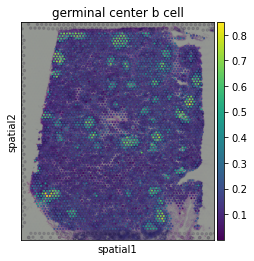

In [19]:
ucd.pl.deconvolve(adata, basis = "spatial", color = "germinal center b cell")